# Capstone Project - Relocation Dilemma (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Worley is a renowned consultancy firm specialising in chemicals, energy and resources. It has over 50 000 employees and offices in over 60 countries all around the world. John, a recent graduate, has been offered a position as a process engineer for Worley and he is beside himself with joy. The employer has made it known to him that he will be working from the office in Stockton-on-Tees in United Kingdom. John needs to make a decision on which neighbourhood he will be living in which is not an easy task as he has no prior knowledge of the quality of life in any of the neighbourhoods in Stockton. John describes himself as a young professional who is somewhat of a health enthusiast. He is outgoing and enjoys eating out. John loves meeting new people from diverse backgrounds and learning about new cultures. John is willing to travel upto 3km to work everyday. He understands that his life outside of work has a direct impact on his work performance, therefore, he is seriously considering which neighbourhood would best serve his needs and give him the best chance to succeed in his new role. <br>

The aim of the project is to determine the most suitable neighbourhood in Stockton-on-Tees that John should reside based on his profile. It is in John and the employer's interest that he makes the right decision in choosing a neighbourhood as this will ensure that he is happy, hits the ground running and performs well at the new job, therefore, contributing to Worley meeting its business targets. As he will be living the nest for the first time, John's family will also be interested in this project as it would give them a peace of mind knowing that he is comfortable where he is. 

## Data <a name="data"></a>

In order to determine which neighbourhood would be most suitable for him to stay, John is interested in the type of venues in the candidate neighbourhoods. Foursquare, which is a massive database on location data, will, therefore, be used in this project to retrieve neighbourhoods in Stockton-on-Tees Borough which are within a 3km radius of Worley's offices. The neighbourhoods will be segmented and explored based on their respective venues. They will then be compared and the neighbourhood that best suits John’s profile will be determined.

The factors that, therefore, determine which neighbourhood John decides to stay are:
* the type of venues that are in the neighbourhood
* distance of neighbourhood from John's work office

The following data sources will be needed to generate the required information:
* **Google Maps API geocoding** to obtain coordinate of Worley's Stockton-on-Tees offices.
* **Foursquare API** to determine neighbourhoods within the preferred radius and their respective venues. 


### Retrieving Stockton-on-Tees Neighbourhoods and their Coordinates 

A list of neighbourhoods in Stockton-on-Tees are scrapped from the internet using BeautifulSoup and into a dataframe. Columns of neighbourhood latitude and longitude coordinates are added to the dataframe. 

In [1]:
#import required dependencies

import requests # handles requests
import pandas as pd # for data analysis
import numpy as np # handles data in a vectorized manner
import random # for random number generation
from bs4 import BeautifulSoup # for web scrapping.

!pip install geopy
from geopy.geocoders import Nominatim # converts an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
#Scrap list of neighbourhoods in Stockton-on-Tees from Wikipedia using BeautifulSoup

# Send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Areas_of_Stockton-on-Tees").text
# Parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')
# Create a list to store neighbourhood data
neighborhoodList = []
# Append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
  neighborhoodList.append(row.text)
# Create a new DataFrame from the list
df_neighbourhoods = pd.DataFrame({"Neighbourhood": neighborhoodList})
df_neighbourhoods.head(13)

,Neighbourhood
0,Bishopsgarth
1,Elm Tree Farm
2,"Fairfield, County Durham"
3,"Grangefield, Stockton-on-Tees"
4,"Hardwick, County Durham"
5,"Hartburn, County Durham"
6,"Mount Pleasant, Stockton-on-Tees"
7,"Newtown, Stockton-on-Tees"
8,"Norton, County Durham"
9,"Oxbridge, Stockton-on-Tees"


In [52]:
# Use DataFrame.insert() to add a column
df_neighbourhoods.insert(1, "Latitude", [54.578, 54.5747, 54.5675, 54.57, 54.586, 54.5582, 54.603, 54.571, 54.589, 54.5615, 54.57174, 54.589, 54.5744], True)
df_neighbourhoods.insert(2,"Longitude", [-1.359,-1.3514,-1.3541,-1.32,-1.354,-1.3428,-1.421,-1.322,-1.3157,-1.3305,-1.30069,-1.342,-1.3068], True)
df_neighbourhoods = df_neighbourhoods.loc[:,~df_neighbourhoods.columns.duplicated()]
df_neighbourhoods

,Neighbourhood,Latitude,Longitude
0,Bishopsgarth,54.57800,-1.35900
1,Elm Tree Farm,54.57470,-1.35140
2,"Fairfield, County Durham",54.56750,-1.35410
3,"Grangefield, Stockton-on-Tees",54.57000,-1.32000
4,"Hardwick, County Durham",54.58600,-1.35400
5,"Hartburn, County Durham",54.55820,-1.34280
6,"Mount Pleasant, Stockton-on-Tees",54.60300,-1.42100
7,"Newtown, Stockton-on-Tees",54.57100,-1.32200
8,"Norton, County Durham",54.58900,-1.31570
9,"Oxbridge, Stockton-on-Tees",54.56150,-1.33050


### Retrieving Worley Stockton-on-Tees Offices Coordinates

The coordinates of the Worley offices in Stockton are determined using the specific address and geocoder.

In [4]:
#obtain coordinates for Worley Stockton-on-Tees offices
address = 'Preston Farm Industrial Estate, Stockton-on-Tees TS18 3TS, United Kingdom'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
worley_location = (latitude, longitude)
print(worley_location)

(54.5448129, -1.3284931741818482)


### Retrieving Venues in Stockton-on-Tees Neighbourhoods

The venues in Stockton-on-Tees neighbourhoods are obtained from Foursquare database. 

In [5]:
CLIENT_ID = 'Z525JQSK2STRUQGJQJMTTOAYPMURAIUQH0YAZQDXXFHJIELX' # Foursquare ID
CLIENT_SECRET = 'QGZAO4QJVL4JYDZIO5HKDT3VSRYJ0HP533L3RWPNBYQ43BAC' # Foursquare Secret
ACCESS_TOKEN = 'IH3GRADQKNV5R5IXYPFNQJAQKJ50TAMX5ZEBF4F5WVT2E4BK' # FourSquare Access Token
VERSION = '20180604'
LIMIT = 300
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z525JQSK2STRUQGJQJMTTOAYPMURAIUQH0YAZQDXXFHJIELX
CLIENT_SECRET:QGZAO4QJVL4JYDZIO5HKDT3VSRYJ0HP533L3RWPNBYQ43BAC


In [6]:
# create function that extracts the category of the venues in Stockton-on-Tees
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius
            )
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
#use getNearbyVenues function to create dataframe with venues in Stockton-on-Tees 
stockton_venues = getNearbyVenues(df_neighbourhoods['Neighbourhood'], df_neighbourhoods['Latitude'], df_neighbourhoods['Longitude'])
stockton_venues

Bishopsgarth
Elm Tree Farm
Fairfield, County Durham
Grangefield, Stockton-on-Tees
Hardwick, County Durham
Hartburn, County Durham
Mount Pleasant, Stockton-on-Tees
Newtown, Stockton-on-Tees
Norton, County Durham
Oxbridge, Stockton-on-Tees
Portrack
Roseworth
Tilery


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
0,Bishopsgarth,54.5780,-1.3590,Ropner Park,Park
1,Bishopsgarth,54.5780,-1.3590,The Masham,Pub
2,Bishopsgarth,54.5780,-1.3590,Co-op Food,Grocery Store
3,Bishopsgarth,54.5780,-1.3590,Co-op Food,Grocery Store
4,Bishopsgarth,54.5780,-1.3590,BP,Gas Station
...,...,...,...,...,...
312,Tilery,54.5744,-1.3068,Domino's Pizza,Pizza Place
313,Tilery,54.5744,-1.3068,Dunelm,Furniture / Home Store
314,Tilery,54.5744,-1.3068,Greggs,Bakery
315,Tilery,54.5744,-1.3068,B&M Store,Discount Store


So now that the venues in the different neighbourhoods which are within a radius of 3km from the Worley Offices have been obtained, this concludes the data gathering phase.  

## Methodology <a name="methodology"></a>

In this project the most suitable neighbourhood in Stockton-on-Tees that John should stay is determined. The neighbourhoods that are considered are those within a 3km radius of Worley Stockton-on-Tees offices. Firstly, the required data was collected, that is, the location of Worley offices as well as the candidate neighbourhoods which are a maximum of 3km away from the offices. The venues within these neighbourhoods were determined making use of the Foursquare database.

In the second step, exploratory data analysis of the collected data will be carried out. The number of venues in each neighbourhood will be determined followed by analysis of each neighbourhood to determine the types of venues found in it. The venues in each neighbourhood are listed in terms of how common they are. 

In the third and final step, clusters of similar neighbourhoods are then created and analyzed. The one containing neighbourhoods most suited to John's profile is selected. The neighbourhoods in the selected cluster are further analyzed to determine the one best suited to John's profile based on the venue categories as well as the distance of the neighbourhood from the Worley Offices. The best neighbourhood is then recommended to John, his employer and his family. 


### Exploratory Analysis of Neighbourhoods

Exploratory analysis is carried out on neighbourhood raw data in order to derive additional information. 

In [8]:
#group venues according to neighbourhood and therefore determine number of venues for each neighbourhood

stockton_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category
Neighbourhood,,,,
Bishopsgarth,13,13,13,13
Elm Tree Farm,30,30,30,30
"Fairfield, County Durham",30,30,30,30
"Grangefield, Stockton-on-Tees",30,30,30,30
"Hardwick, County Durham",17,17,17,17
"Hartburn, County Durham",30,30,30,30
"Mount Pleasant, Stockton-on-Tees",4,4,4,4
"Newtown, Stockton-on-Tees",30,30,30,30
"Norton, County Durham",29,29,29,29


In [9]:
#determine number of unique categories
print('There are {} uniques categories.'.format(len(stockton_venues['Venue Category'].unique())))

There are 37 uniques categories.


In [10]:
#analyze each neighbourhood

# one hot encoding
stockton_onehot = pd.get_dummies(stockton_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
stockton_onehot['Neighbourhood'] = stockton_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [stockton_onehot.columns[-1]] + list(stockton_onehot.columns[:-1])
stockton_onehot = stockton_onehot[fixed_columns]

stockton_onehot.head()

,Neighbourhood,American Restaurant,Bakery,Bar,Bookstore,Bowling Alley,Café,Casino,Coffee Shop,Comfort Food Restaurant,...,Pizza Place,Pub,Sandwich Place,Shopping Mall,Supermarket,Theater,Trail,Train Station,Video Game Store,Warehouse Store
0,Bishopsgarth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bishopsgarth,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Bishopsgarth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bishopsgarth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bishopsgarth,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
stockton_onehot.shape

(317, 38)

In [12]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

stockton_grouped = stockton_onehot.groupby('Neighbourhood').mean().reset_index()
stockton_grouped

,Neighbourhood,American Restaurant,Bakery,Bar,Bookstore,Bowling Alley,Café,Casino,Coffee Shop,Comfort Food Restaurant,...,Pizza Place,Pub,Sandwich Place,Shopping Mall,Supermarket,Theater,Trail,Train Station,Video Game Store,Warehouse Store
0,Bishopsgarth,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.307692,0.000000,0.000000,0.153846,0.000000,0.00,0.000000,0.000000,0.000000
1,Elm Tree Farm,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000,0.066667,0.000000,...,0.033333,0.166667,0.033333,0.033333,0.100000,0.033333,0.00,0.000000,0.033333,0.000000
2,"Fairfield, County Durham",0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,...,0.033333,0.133333,0.033333,0.033333,0.100000,0.033333,0.00,0.000000,0.033333,0.033333
3,"Grangefield, Stockton-on-Tees",0.066667,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.100000,0.033333,...,0.033333,0.166667,0.033333,0.033333,0.066667,0.033333,0.00,0.000000,0.033333,0.000000
4,"Hardwick, County Durham",0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,...,0.000000,0.235294,0.000000,0.000000,0.117647,0.058824,0.00,0.058824,0.000000,0.000000
5,"Hartburn, County Durham",0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,...,0.033333,0.200000,0.033333,0.033333,0.033333,0.033333,0.00,0.000000,0.033333,0.033333
6,"Mount Pleasant, Stockton-on-Tees",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000
7,"Newtown, Stockton-on-Tees",0.033333,0.033333,0.033333,0.000000,0.000000,0.033333,0.033333,0.100000,0.033333,...,0.033333,0.166667,0.033333,0.033333,0.066667,0.033333,0.00,0.000000,0.033333,0.000000
8,"Norton, County Durham",0.034483,0.034483,0.034483,0.000000,0.000000,0.034483,0.000000,0.103448,0.034483,...,0.034483,0.068966,0.034483,0.034483,0.206897,0.034483,0.00,0.000000,0.034483,0.000000
9,"Oxbridge, Stockton-on-Tees",0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.066667,0.000000,...,0.033333,0.133333,0.033333,0.033333,0.066667,0.033333,0.00,0.000000,0.033333,0.033333


In [13]:
stockton_grouped.shape

(13, 38)

In [14]:
#print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in stockton_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = stockton_grouped[stockton_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    

----Bishopsgarth----
           venue  freq
0            Pub  0.31
1  Grocery Store  0.23
2    Supermarket  0.15
3    Gas Station  0.08
4           Park  0.08


----Elm Tree Farm----
                 venue  freq
0                  Pub  0.17
1        Grocery Store  0.13
2          Supermarket  0.10
3          Coffee Shop  0.07
4  American Restaurant  0.03


----Fairfield, County Durham----
            venue  freq
0             Pub  0.13
1   Grocery Store  0.13
2     Supermarket  0.10
3     Coffee Shop  0.07
4  Discount Store  0.07


----Grangefield, Stockton-on-Tees----
                  venue  freq
0                   Pub  0.17
1           Coffee Shop  0.10
2   American Restaurant  0.07
3           Supermarket  0.07
4  Gym / Fitness Center  0.07


----Hardwick, County Durham----
                     venue  freq
0                      Pub  0.24
1            Grocery Store  0.12
2              Supermarket  0.12
3      American Restaurant  0.06
4  Comfort Food Restaurant  0.06


----Hartbu

In [15]:
#write a function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
#create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = stockton_grouped['Neighbourhood']

for ind in np.arange(stockton_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(stockton_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bishopsgarth,Pub,Grocery Store,Supermarket,Gas Station,Hotel,Convenience Store,Park,Comfort Food Restaurant,Furniture / Home Store,Fast Food Restaurant
1,Elm Tree Farm,Pub,Grocery Store,Supermarket,Coffee Shop,Gym / Fitness Center,Music Store,Bakery,Bar,Bookstore,Discount Store
2,"Fairfield, County Durham",Pub,Grocery Store,Supermarket,Coffee Shop,Discount Store,Warehouse Store,Music Store,Bakery,Bar,Gas Station
3,"Grangefield, Stockton-on-Tees",Pub,Coffee Shop,Gym / Fitness Center,Supermarket,American Restaurant,Theater,Italian Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Shopping Mall
4,"Hardwick, County Durham",Pub,Grocery Store,Supermarket,American Restaurant,Café,Mobile Phone Shop,Convenience Store,Comfort Food Restaurant,Gas Station,Gastropub


### Clustering of Neighbourhoods

Neighbourhoods are assigned to clusters based on their most common venues.

In [17]:
#Run k-means to cluster the neighbourhood into 5 clusters

from sklearn.cluster import KMeans
# set number of clusters
k_num_clusters = 5

stockton_grouped_clustering = stockton_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k_num_clusters, random_state=0).fit(stockton_grouped_clustering)
kmeans

KMeans(n_clusters=5, random_state=0)

In [18]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stockton_merged = df_neighbourhoods

# merge stockton_grouped with neighbourhoods_venues_sorted to add 10 most common venues for each neighbourhood
stockton_merged = stockton_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

stockton_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bishopsgarth,54.5780,-1.3590,3,Pub,Grocery Store,Supermarket,Gas Station,Hotel,Convenience Store,Park,Comfort Food Restaurant,Furniture / Home Store,Fast Food Restaurant
1,Elm Tree Farm,54.5747,-1.3514,4,Pub,Grocery Store,Supermarket,Coffee Shop,Gym / Fitness Center,Music Store,Bakery,Bar,Bookstore,Discount Store
2,"Fairfield, County Durham",54.5675,-1.3541,4,Pub,Grocery Store,Supermarket,Coffee Shop,Discount Store,Warehouse Store,Music Store,Bakery,Bar,Gas Station
3,"Grangefield, Stockton-on-Tees",54.5700,-1.3200,1,Pub,Coffee Shop,Gym / Fitness Center,Supermarket,American Restaurant,Theater,Italian Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Shopping Mall
4,"Hardwick, County Durham",54.5860,-1.3540,0,Pub,Grocery Store,Supermarket,American Restaurant,Café,Mobile Phone Shop,Convenience Store,Comfort Food Restaurant,Gas Station,Gastropub


In [19]:
stockton_merged.shape

(13, 14)

### Cluster 1

In [20]:
stockton_merged.loc[stockton_merged['Cluster Labels'] == 0, stockton_merged.columns[[0] + list(range(4, stockton_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Hardwick, County Durham",Pub,Grocery Store,Supermarket,American Restaurant,Café,Mobile Phone Shop,Convenience Store,Comfort Food Restaurant,Gas Station,Gastropub
11,Roseworth,Pub,Grocery Store,Warehouse Store,Mobile Phone Shop,Café,Comfort Food Restaurant,Convenience Store,Gas Station,Gastropub,American Restaurant


### Cluster 2

In [21]:
stockton_merged.loc[stockton_merged['Cluster Labels'] == 1, stockton_merged.columns[[0] + list(range(4, stockton_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Grangefield, Stockton-on-Tees",Pub,Coffee Shop,Gym / Fitness Center,Supermarket,American Restaurant,Theater,Italian Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Shopping Mall
7,"Newtown, Stockton-on-Tees",Pub,Coffee Shop,Gym / Fitness Center,Supermarket,Discount Store,Italian Restaurant,Bakery,Bar,Café,Casino
8,"Norton, County Durham",Supermarket,Coffee Shop,Gym / Fitness Center,Pub,Video Game Store,Bakery,Bar,Café,Comfort Food Restaurant,Discount Store
10,Portrack,Coffee Shop,Supermarket,Gym / Fitness Center,Pub,Discount Store,Pizza Place,American Restaurant,Sandwich Place,Bowling Alley,Furniture / Home Store
12,Tilery,Supermarket,Coffee Shop,Gym / Fitness Center,Pizza Place,Pub,American Restaurant,Shopping Mall,Café,Fast Food Restaurant,Furniture / Home Store


### Cluster 3

In [22]:
stockton_merged.loc[stockton_merged['Cluster Labels'] == 2, stockton_merged.columns[[0] + list(range(4, stockton_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Mount Pleasant, Stockton-on-Tees",Gastropub,Park,Trail,Pub,Gas Station,Furniture / Home Store,Fast Food Restaurant,Discount Store,Department Store,Convenience Store


### Cluster 4

In [23]:
stockton_merged.loc[stockton_merged['Cluster Labels'] == 3, stockton_merged.columns[[0] + list(range(4, stockton_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bishopsgarth,Pub,Grocery Store,Supermarket,Gas Station,Hotel,Convenience Store,Park,Comfort Food Restaurant,Furniture / Home Store,Fast Food Restaurant


### Cluster 5

In [24]:
stockton_merged.loc[stockton_merged['Cluster Labels'] == 4, stockton_merged.columns[[0] + list(range(4, stockton_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Elm Tree Farm,Pub,Grocery Store,Supermarket,Coffee Shop,Gym / Fitness Center,Music Store,Bakery,Bar,Bookstore,Discount Store
2,"Fairfield, County Durham",Pub,Grocery Store,Supermarket,Coffee Shop,Discount Store,Warehouse Store,Music Store,Bakery,Bar,Gas Station
5,"Hartburn, County Durham",Pub,Grocery Store,Coffee Shop,Discount Store,Park,Warehouse Store,Italian Restaurant,Bakery,Bar,Casino
9,"Oxbridge, Stockton-on-Tees",Pub,Grocery Store,Gym / Fitness Center,Supermarket,Coffee Shop,Discount Store,Park,Italian Restaurant,Bakery,Bar


In [25]:
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors

In [26]:
#visualize clusters

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_num_clusters)
ys = [i + x + (i*x)**2 for i in range(k_num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stockton_merged['Latitude'], stockton_merged['Longitude'], stockton_merged['Neighbourhood'], stockton_merged['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster) +1) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(map_clusters)
        
map_clusters

### Cluster Selection

The venue categories will be assigned to 4 different profile categories, that is, Convenience, Health Enthusiast, Outgoing, and Pro-diversity. The Clusters will then be analyzed against the 4 profile categories. If a cluster satisfies one category of the profile it will be awarded '1' otherwise it will be awarded '0'. Under Pro-diversity, a cluster having one culturally diverse venue category is awarded '1', that having two culturally diverse venue categories is awarded '2', and so on. The cluster having the highest mark is considered to satisfy John's profile the most and will, therefore, be selected at this stage for further analysis.   

In [27]:
# create dataframe of venue categories from stockton_venues

df_venue_categories = stockton_venues[['Venue Category']]
df_venue_categories = df_venue_categories.drop_duplicates()
df_venue_categories.reset_index(drop = True, inplace = True)
df_venue_categories

,Venue Category
0,Park
1,Pub
2,Grocery Store
3,Gas Station
4,Supermarket
5,Convenience Store
6,Hotel
7,Theater
8,Coffee Shop
9,Gym / Fitness Center


In [30]:
# Assign a profile category to each venue category and add column 'Profile Category' to df_venue_categories 

Profile = ['Health Enthusiast', 'Outgoing', 'Convenience', 'Convenience', 'Convenience', 'Convenience', 'Outgoing', 'Outgoing', 'Outgoing', 'Health Enthusiast', 'Outgoing', 'Pro-diversity', 'Pro-diversity', 'Convenience', 'Outgoing', 'Convenience', 'Outgoing', 'Convenience', 'Convenience', 'Convenience', 'Convenience', 'Convenience', 'Convenience', 'Health Enthusiast', 'Outgoing', 'Outgoing', 'Outgoing', 'Outgoing', 'Outgoing', 'Outgoing', 'Convenience', 'Convenience', 'Health Enthusiast', 'Convenience', 'Convenience', 'Outgoing', 'Convenience']
df_venue_categories['Profile'] = Profile
df_venue_categories.head()

,Venue Category,Profile
0,Park,Health Enthusiast
1,Pub,Outgoing
2,Grocery Store,Convenience
3,Gas Station,Convenience
4,Supermarket,Convenience


In [32]:
# determine number of venue categories in each profile category

df_venue_categories.groupby('Profile').count()

,Venue Category
Profile,
Convenience,17
Health Enthusiast,4
Outgoing,14
Pro-diversity,2


In [44]:
# create an Empty DataFrame object

df_profile = pd.DataFrame()
  
# score the clusters and append columns to the created DataFrame
df_profile['Profile'] = ['Convenience', 'Health Enthusiast', 'Outgoing', 'Pro-diversity', 'Total']
df_profile['Cluster 1'] = [1, 0, 1, 1, 3]
df_profile['Cluster 2'] = [1, 1, 1, 2, 5]
df_profile['Cluster 3'] = [1, 1, 1, 0, 3]
df_profile['Cluster 4'] = [1, 1, 1, 0, 3]
df_profile['Cluster 5'] = [1, 1, 1, 1, 4]
df_profile.set_index('Profile', inplace = True)
df_profile.head(6)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Profile,,,,,
Convenience,1,1,1,1,1
Health Enthusiast,0,1,1,1,1
Outgoing,1,1,1,1,1
Pro-diversity,1,2,0,0,1
Total,3,5,3,3,4


In [45]:
# create dataframe from the row titled 'Total' in df_profile

df_total = df_profile.iloc[[4]].transpose()
df_total=df_total.astype(float)
df_total.head()

Profile,Total
Cluster 1,3.0
Cluster 2,5.0
Cluster 3,3.0
Cluster 4,3.0
Cluster 5,4.0


In [46]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

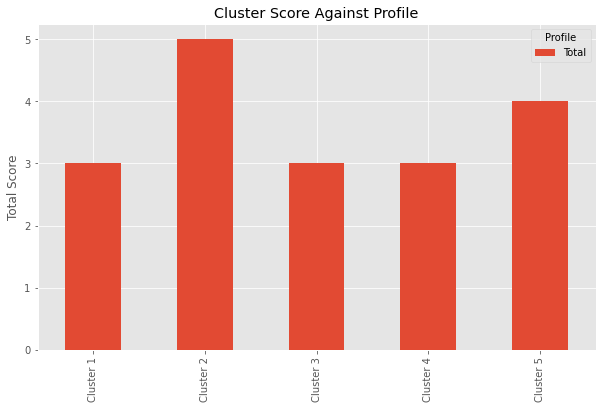

In [47]:
# plot data in df_total and visualize cluster analysis results

df_total.plot(kind='bar', figsize=(10, 6))

plt.xlabel('') # add to x-label to the plot
plt.ylabel('Total Score') # add y-label to the plot
plt.title('Cluster Score Against Profile') # add title to the plot

plt.show()

Cluster 2 has the highest total of 5 and is, therefore, selected as the cluster containing neighbourhoods that best suit John's profile. The cluster satisfies all the aspects of the profile, that is, Convenience, Health Enthusiast, Outgoing, Pro-diversity.

### Neighbourhood Selection

In order to select the most suitable neighbourhood for John within Cluster 2, the same procedure as for selection of cluster is carried out. In addition , the distance of the neighbourhoods to Worley offices will also be calculated using the location coordinates in the Haversine formula. The best neighbourhood will be one that suits John's profile and is the shortest distance to his workplace.    

In [48]:
# create an Empty DataFrame object

df_profile_neighbourhoods = pd.DataFrame()
  
# score the neighbourhoods and append columns to the created DataFrame
df_profile_neighbourhoods['Profile'] = ['Convenience', 'Health Enthusiast', 'Outgoing', 'Pro-diversity', 'Total']
df_profile_neighbourhoods['Grangefield, Stockton-on-Tees'] = [1, 1, 1, 2, 5]
df_profile_neighbourhoods['Newtown, Stockton-on-Tees'] = [1, 1, 1, 1, 4]
df_profile_neighbourhoods['Norton, County Durham'] = [1, 1, 1, 0, 3]
df_profile_neighbourhoods['Potrack'] = [1, 1, 1, 1, 4]
df_profile_neighbourhoods['Tilery'] = [1, 1, 1, 1, 4]
df_profile_neighbourhoods.set_index('Profile', inplace = True)
df_profile_neighbourhoods.head(6)

,"Grangefield, Stockton-on-Tees","Newtown, Stockton-on-Tees","Norton, County Durham",Potrack,Tilery
Profile,,,,,
Convenience,1,1,1,1,1
Health Enthusiast,1,1,1,1,1
Outgoing,1,1,1,1,1
Pro-diversity,2,1,0,1,1
Total,5,4,3,4,4


In [49]:
# create dataframe from the row titled 'Total' in df_profile_neighbourhoods

df_total_neighbourhoods = df_profile_neighbourhoods.iloc[[4]].transpose()
df_total_neighbourhoods=df_total_neighbourhoods.astype(float)
df_total_neighbourhoods.head()

Profile,Total
"Grangefield, Stockton-on-Tees",5.0
"Newtown, Stockton-on-Tees",4.0
"Norton, County Durham",3.0
Potrack,4.0
Tilery,4.0


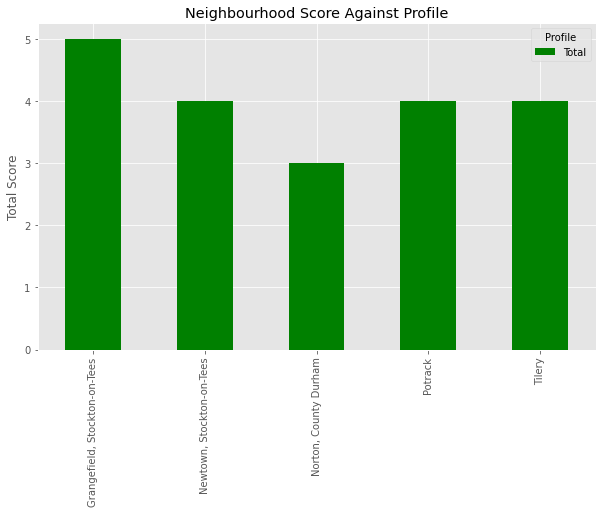

In [61]:
# plot data in df_total_neighbourhoods

df_total_neighbourhoods.plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('') # add to x-label to the plot
plt.ylabel('Total Score') # add y-label to the plot
plt.title('Neighbourhood Score Against Profile') # add title to the plot

plt.show()

Grangefield, Stockton-on-Tees has the highest mark of 5 showing that it best suits John's profile compared to the other neighbourhoods. However, Newtown Stockton-on-Tees, Potrack and Tilery, also satify all the aspects of John's profile although they do not offer as much cultural diversity as Grangefield. This is a  close call. A calculation of distance between each of the four neighbourhoods to the Worley Offices is, therefore, carried out in order to confirm which neighbourhood is overally most suitable for John to live in. 

In [54]:
#create dataframe consisting of Cluster 2 neighbourhoods coordinates from df_neighbourhoods

df_neighbourhoods.iloc[[3,7,10,12]]

,Neighbourhood,Latitude,Longitude
3,"Grangefield, Stockton-on-Tees",54.57000,-1.32000
7,"Newtown, Stockton-on-Tees",54.57100,-1.32200
10,Portrack,54.57174,-1.30069
12,Tilery,54.57440,-1.30680


In [55]:
#retrieve Worley offices coordinates

worley_location

(54.5448129, -1.3284931741818482)

In [56]:
#create function to calculate distance between Worley offices and neighbourhood

import math

def distance (lat1, lat2, lon1, lon2):

    R = 6373.0     #radius of the Earth

    #calculating distance between Elm Tree Farm and Worley Offices

    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance

In [57]:
# Calculate distance between Worley Offices and candidate neighbourhoods in Cluster 2

Grangefield_distance = distance(54.57000,54.5448129,-1.32000,-1.3284931741818482)
Newtown_distance = distance(54.57100, 54.5448129, -1.32200,-1.3284931741818482)
Potrack_distance = distance(54.57174,54.5448129,-1.30069,-1.3284931741818482)
Tilery_distance = distance(54.57440,54.5448129,-1.30680,-1.3284931741818482)

print ('Distance between Worley Offices and Grangefield,Stockton-on-Tees is', Grangefield_distance)
print ('Distance between Worley Offices and Newtown, Stockton-on-Tees is', Newtown_distance)
print ('Distance between Worley Offices and Potrack is', Potrack_distance)
print ('Distance between Worley Offices and Tilery is', Tilery_distance)

Distance between Worley Offices and Grangefield,Stockton-on-Tees is 2.854614426912774
Distance between Worley Offices and Newtown, Stockton-on-Tees is 2.9427415778287402
Distance between Worley Offices and Potrack is 3.490914244732791
Distance between Worley Offices and Tilery is 3.5760442445868525


In [58]:
# create an Empty DataFrame object

df_neighbourhood_distance = pd.DataFrame()
  
# append columns to the created DataFrame
df_neighbourhood_distance['Neighbourhood'] = ['Grangefield Stockton-on-Tees', 'Newtown Stockton-on-Tees', 'Potrack', 'Tilery']
df_neighbourhood_distance['Distance in km'] = [2.854614426912774, 2.9427415778287402, 3.490914244732791, 3.5760442445868525]
df_neighbourhood_distance.set_index('Neighbourhood', inplace = True)
df_neighbourhood_distance.head()

,Distance in km
Neighbourhood,
Grangefield Stockton-on-Tees,2.854614
Newtown Stockton-on-Tees,2.942742
Potrack,3.490914
Tilery,3.576044


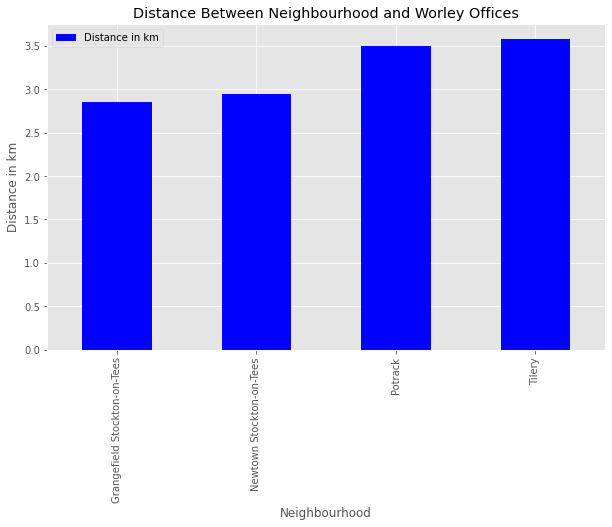

In [59]:
# plot data in df_neighbourhood_distance

df_neighbourhood_distance.plot(kind='bar', figsize=(10, 6), color='blue')

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Distance in km') # add y-label to the plot
plt.title('Distance Between Neighbourhood and Worley Offices') # add title to the plot

plt.show()

Grangefield Stockton-on-Tees is the closest to the Worley Offices, therefore, it is the neighbourhood that best suits John's profile based on both of the defined criteria, that is, distance from his work place and types of venues in the neighbourhood.

## Results and Discussion <a name="results"></a>

Five clusters of neighbourhoods in Stockton-on-Tees were created using KMeans and similar neighbourhoods were assigned to each cluster. A map showing the five clusters was created using folium. The five clusters were analyzed to determine which one was better suited to John's profile. Firstly, John's profile was split into four categories, that is, Convenience, Health Enthusiast, Outgoing, and Pro-diversity. The 37 venue categories in Stockton-on-Tees which were obtained from Foursquare database were matched to a category of John's profile. The Clusters were then analyzed against the profile categories. If a cluster satisfied one category of the profile it was awarded '1' otherwise it was awarded '0'. Under Pro-diversity, a cluster having one culturally diverse venue category was awarded '1', that having two culturally diverse venue categories was awarded '2', and so on. Cluster 2 had the highest mark of 5. The neighbourhoods in the cluster have Gym/Fitness Centres were John can go and workout whenever he wants as he is a health enthusiast. The cluster has a wide selection of hangout spots, some of which are more suited for professional meet ups like the coffeeshop and restaurants, and some which are a bit more casual like the pub, casino, bowling alley, and theatre. Cluster 2 also has several venues that are convenient and would make John's life easier, these include, supermarkets, shopping malls, discount stores, bakeries, and furniture/home stores. Lastly, Cluster 2 shows cultural diversity which is an important factor of John's profile. It has Italian Restaurant and American Restaurant venue categories. Cluster 2 satisfies John's profile the most and was, therefore, selected for further analysis. 

Cluster 2 was further analyzed in order to determine the neighbourhood in the cluster that best suits John's profile. the same procedure as for selection of cluster was carried out. Grangefield Stockton-on-Tees satisfied all aspects of John's profile and had the highest overall score of 5. However, Newtown Stockton-on-Tees, Potrack and Tilery, also satified all of John's profile categories although they did not offer as much cultural diversity as Grangefield. A calculation of distance between each of the four remaining candidate neighbourhoods and the Worley Offices was carried out in order to confirm which neighbourhood was overally most suitable for John to live in. The distance was calculated using the location coordinates in the Haversine formula. The best neighbourhood would be one that suits John's profile and is the shortest distance to his workplace. Analysis of the obtained results showed that Grangefield Stockton-on-Tees was the nearest to the Worley offices with a distance of 2.85km. It was, therefore, selected as the most suitable neighbourhood for John to live in. 

## Conclusion <a name="conclusion"></a>

The purpose of the project was to determine the most suitable neighbourhood for John to live in, when he located to Stockton-on-Tees in the UK, which would make him feel comfortable and allow him to perform at his best at his new job. The list of neighbourhoods in Stockton-on-Tees was scrapped from Wikipedia together with their coordinates. Foursquare was used to determine the neighbourhoods within a 3km radius from Worley offices as well as retrieve the venues in these candidate neighbourhoods. KMeans was then used to cluster similar neighbourhoods with the resulting 5 clusters being visualized using folium. The clusters were analyzed to determine the one most suited to John's profile based on the venue categories. Cluster 2 proved to be the most suited, therefore, it was further analyzed to pick a neighbourhood within the cluster which would be recommended to John. The neighbourhood was selected based on venues as well as distance from Worley offices. The neighbourhood giving the best results was Grangefield Stockton-on-Tees which is 2.85km from John's workplace and satifies all of his profile categories whilst also offering greater cultural diversity. Grangefield Stockton-on-Tees is, therefore, being recommended as most suited for John.  